In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import datetime
path = "/content/drive/My Drive/Ocean Cleanup Project/Data_Level5_BAH_OceanCleanup.csv"
data = pd.read_csv(path,parse_dates=['Cleanup Date'])


data['Cleanup Date'] = data['Cleanup Date'].astype(str)
data.head(10)
data = data[data['Cleanup ID']!=38373]
data = data.dropna()

for i in data.index:
  data.at[i, 'Cleanup Data'] = datetime.datetime.strptime(data.at[i,"Cleanup Date"], "%m/%d/%Y").strftime("%Y-%m-%d")

data.head(15)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Cleanup Date,Group Name,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line (1 yard/meter = 1 piece),Rope (1 yard/meter = 1 piece),Fishing Gear (Clean Swell),6-Pack Holders,Other Plastic/Foam Packaging,"Other Plastic Bottles (oil, bleach, etc.)",Strapping Bands,Tobacco Packaging/Wrap,Other Packaging (Clean Swell),"Appliances (refrigerators, washers, etc.)",Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Cleanup Data
764,1667,"Prince William County, VA, USA","Virginia, USA",United States,"38.78002, -77.50154","Land (beach, shoreline and inland)",2/15/2016,Beaconfire,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
775,1721,"Prince William County, VA, USA","Virginia, USA",United States,"38.78001, -77.50136","Land (beach, shoreline and inland)",2/15/2016,Beaconfire,1.0,0.0,1.0,0.01,0.0009,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
776,1722,"Prince William County, VA, USA","Virginia, USA",United States,"38.78013, -77.50154","Land (beach, shoreline and inland)",2/15/2016,Guest,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
783,1734,"Prince William County, VA, USA","Virginia, USA",United States,"38.78008, -77.50141","Land (beach, shoreline and inland)",2/15/2016,Guest,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
801,1761,"Prince William County, VA, USA","Virginia, USA",United States,"38.77997, -77.50151","Land (beach, shoreline and inland)",2/15/2016,Bfire,1.0,0.0,1.0,0.01,0.0075,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
806,1769,"Prince William County, VA, USA","Virginia, USA",United States,"38.77992, -77.5014","Land (beach, shoreline and inland)",2/15/2016,Bfire,1.0,0.0,1.0,0.01,0.0060,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
1440,2912,"Miami-Dade County, FL, USA","Florida, USA",United States,"25.78409, -80.18565","Land (beach, shoreline and inland)",7/19/2016,Miami Science Barge,1.0,0.0,1.0,4.32,0.0356,0.0,1,28,4,2,29,0,0,2,0,20,0,2,15,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,0,0,0,3,0,0,0,0,1,0,0,34,152.0,2016-07-19
1444,2921,"Duval County, FL, USA","Florida, USA",United States,"30.33043, -81.40103","Land (beach, shoreline and inland)",7/20/2016,Bstp,1.0,0.0,1.0,1.66,0.0423,0.0,3,3,1,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,20.0,2016-07-20
1463,2943,"Napa County, CA, USA","California, USA",United States,"38.33832, -122.26049","Land (beach, shoreline and inland)",7/11/2016,Oxbow,2.0,0.0,2.0,4.37,0.0120,0.0,34,9,7,5,10,0,3,6,3,3,1,2,2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,12,0,0,0,0,2,0,0,7,118.0,2016-07-11
1464,2944,"New Hanover County, NC, USA","North Carolina, USA",United States,"34.27522, -77.75284","Land (beach, shoreline and inland)",7/22/2016,zone 1,1.0,0.0,1.0,3.63,3.0457,0.0,0,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,8,0,0,0,0,1,0,0,0,21.0,2016-07-22


In [ ]:
data = data.rename(columns={"Cleanup Date": "Date"})

data['Date'] = pd.to_datetime(data.Date)
data = data[0:20]
data.head(19)


,Cleanup ID,Zone,State,Country,GPS,Cleanup Type,Date,Group Name,Adults,Children,People,Pounds,Miles,# of bags,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Bottles (Glass),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,Paper Bags,"Cups, Plates (Paper)","Cups, Plates (Plastic)","Cups, Plates (Foam)","Fishing Buoys, Pots & Traps",Fishing Net & Pieces,Fishing Line (1 yard/meter = 1 piece),Rope (1 yard/meter = 1 piece),Fishing Gear (Clean Swell),6-Pack Holders,Other Plastic/Foam Packaging,"Other Plastic Bottles (oil, bleach, etc.)",Strapping Bands,Tobacco Packaging/Wrap,Other Packaging (Clean Swell),"Appliances (refrigerators, washers, etc.)",Balloons,Cigar Tips,Cigarette Lighters,Construction Materials,Fireworks,Tires,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Cleanup Data
764,1667,"Prince William County, VA, USA","Virginia, USA",United States,"38.78002, -77.50154","Land (beach, shoreline and inland)",2016-02-15,Beaconfire,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
775,1721,"Prince William County, VA, USA","Virginia, USA",United States,"38.78001, -77.50136","Land (beach, shoreline and inland)",2016-02-15,Beaconfire,1.0,0.0,1.0,0.01,0.0009,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
776,1722,"Prince William County, VA, USA","Virginia, USA",United States,"38.78013, -77.50154","Land (beach, shoreline and inland)",2016-02-15,Guest,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
783,1734,"Prince William County, VA, USA","Virginia, USA",United States,"38.78008, -77.50141","Land (beach, shoreline and inland)",2016-02-15,Guest,1.0,0.0,1.0,0.01,0.0000,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
801,1761,"Prince William County, VA, USA","Virginia, USA",United States,"38.77997, -77.50151","Land (beach, shoreline and inland)",2016-02-15,Bfire,1.0,0.0,1.0,0.01,0.0075,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
806,1769,"Prince William County, VA, USA","Virginia, USA",United States,"38.77992, -77.5014","Land (beach, shoreline and inland)",2016-02-15,Bfire,1.0,0.0,1.0,0.01,0.0060,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2016-02-15
1440,2912,"Miami-Dade County, FL, USA","Florida, USA",United States,"25.78409, -80.18565","Land (beach, shoreline and inland)",2016-07-19,Miami Science Barge,1.0,0.0,1.0,4.32,0.0356,0.0,1,28,4,2,29,0,0,2,0,20,0,2,15,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,4,0,1,0,0,0,0,0,0,3,0,0,0,0,1,0,0,34,152.0,2016-07-19
1444,2921,"Duval County, FL, USA","Florida, USA",United States,"30.33043, -81.40103","Land (beach, shoreline and inland)",2016-07-20,Bstp,1.0,0.0,1.0,1.66,0.0423,0.0,3,3,1,0,0,0,0,0,0,3,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,20.0,2016-07-20
1463,2943,"Napa County, CA, USA","California, USA",United States,"38.33832, -122.26049","Land (beach, shoreline and inland)",2016-07-11,Oxbow,2.0,0.0,2.0,4.37,0.0120,0.0,34,9,7,5,10,0,3,6,3,3,1,2,2,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,12,0,0,0,0,2,0,0,7,118.0,2016-07-11
1464,2944,"New Hanover County, NC, USA","North Carolina, USA",United States,"34.27522, -77.75284","Land (beach, shoreline and inland)",2016-07-22,zone 1,1.0,0.0,1.0,3.63,3.0457,0.0,0,2,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,8,0,0,0,0,1,0,0,0,21.0,2016-07-22


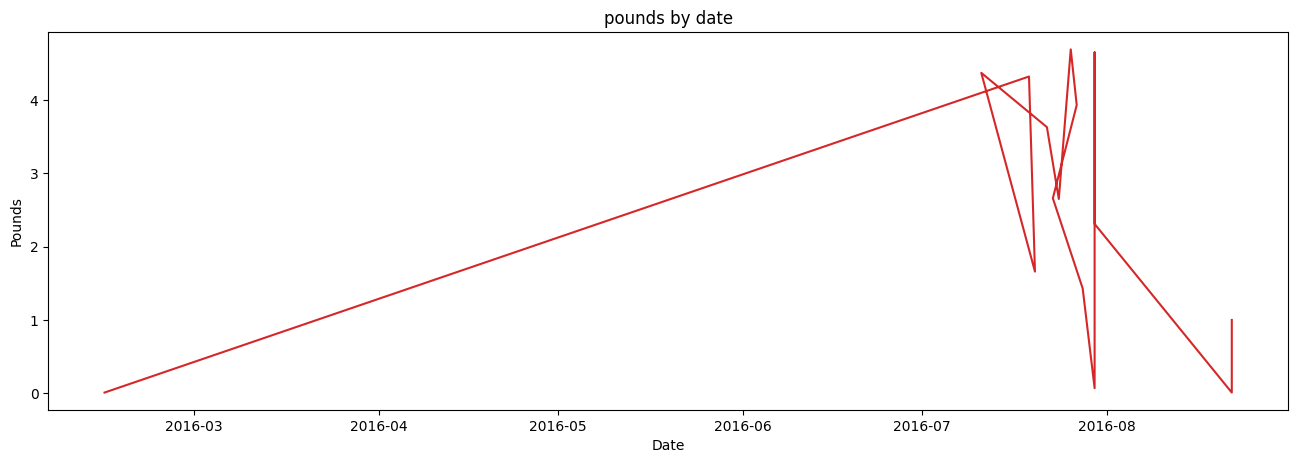

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Pounds', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=data['Date'], y=data['Pounds'], title='pounds by date')    